#**Import Library**

In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
sns.set_style("whitegrid")

#**Load Dataset**

In [2]:
df = pd.read_excel('adidas_sales.xlsx')

#**Exploratory Data Analysis**

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [4]:
# Fixed the name of each columns
df = df.loc[3:].reset_index(drop=True)
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


*Note:*
- It looks like several data types is wrong
- No missing value

In [7]:
# Change the several object data types into numeric and datetime types
converting_columns = ['Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']
for col in converting_columns:
    if col == 'Invoice Date':
      df[col] = pd.to_datetime(df[col], errors='coerce')
    else:
      df[col] = pd.to_numeric(df[col], errors='coerce')

# Make a new columns from Invoice Date into several types
df['Day'] = df['Invoice Date'].dt.day
df['Month'] = df['Invoice Date'].dt.month
df['Year'] = df['Invoice Date'].dt.year
df['Weekday'] = df['Invoice Date'].dt.day_name()

In [8]:
# Check again the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Day               9648 non-null   int32         
 14  Month             9648 n

In [9]:
# Check numeric stats descriptive
df.describe(include='number')

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Day,Month,Year
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.244761,0.422991,14.696310,6.458126,2020.865050
std,14.705397,214.252030,141916.016727,54193.113713,0.097197,7.348019,3.454799,0.341688
min,7.000000,0.000000,0.000000,0.000000,0.100000,1.000000,1.000000,2020.000000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000,9.000000,3.000000,2021.000000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000,15.000000,6.000000,2021.000000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000,21.000000,9.000000,2021.000000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000,31.000000,12.000000,2021.000000


In [10]:
# Check Distribution of object data types
df.describe(include='object')

,Retailer,Retailer ID,Region,State,City,Product,Sales Method,Weekday
count,9648,9648,9648,9648,9648,9648,9648,9648
unique,6,4,5,50,52,6,3,7
top,Foot Locker,1185732,West,Texas,Portland,Men's Street Footwear,Online,Tuesday
freq,2637,5265,2448,432,360,1610,4889,1490


In [11]:
# Checking Null value of each columns, if having NaN we remove
total = len(df)
missing_found = False
for col in df.columns:
    Nan_missing = df[col].isnull().sum()
    percentOfNan = Nan_missing / total * 100

    if Nan_missing > 0:
        print(f'Column {col} Have missing value {Nan_missing} {percentOfNan:.2f}%')

if not missing_found:
    print('The dataset is clear')

The dataset is clear


In [12]:
# Checking the data duplicated
print('Total of duplicated data is:', df.duplicated().sum())

Total of duplicated data is: 0


*Note:*
The dataset is clear, doesn't have missing value and data duplicated

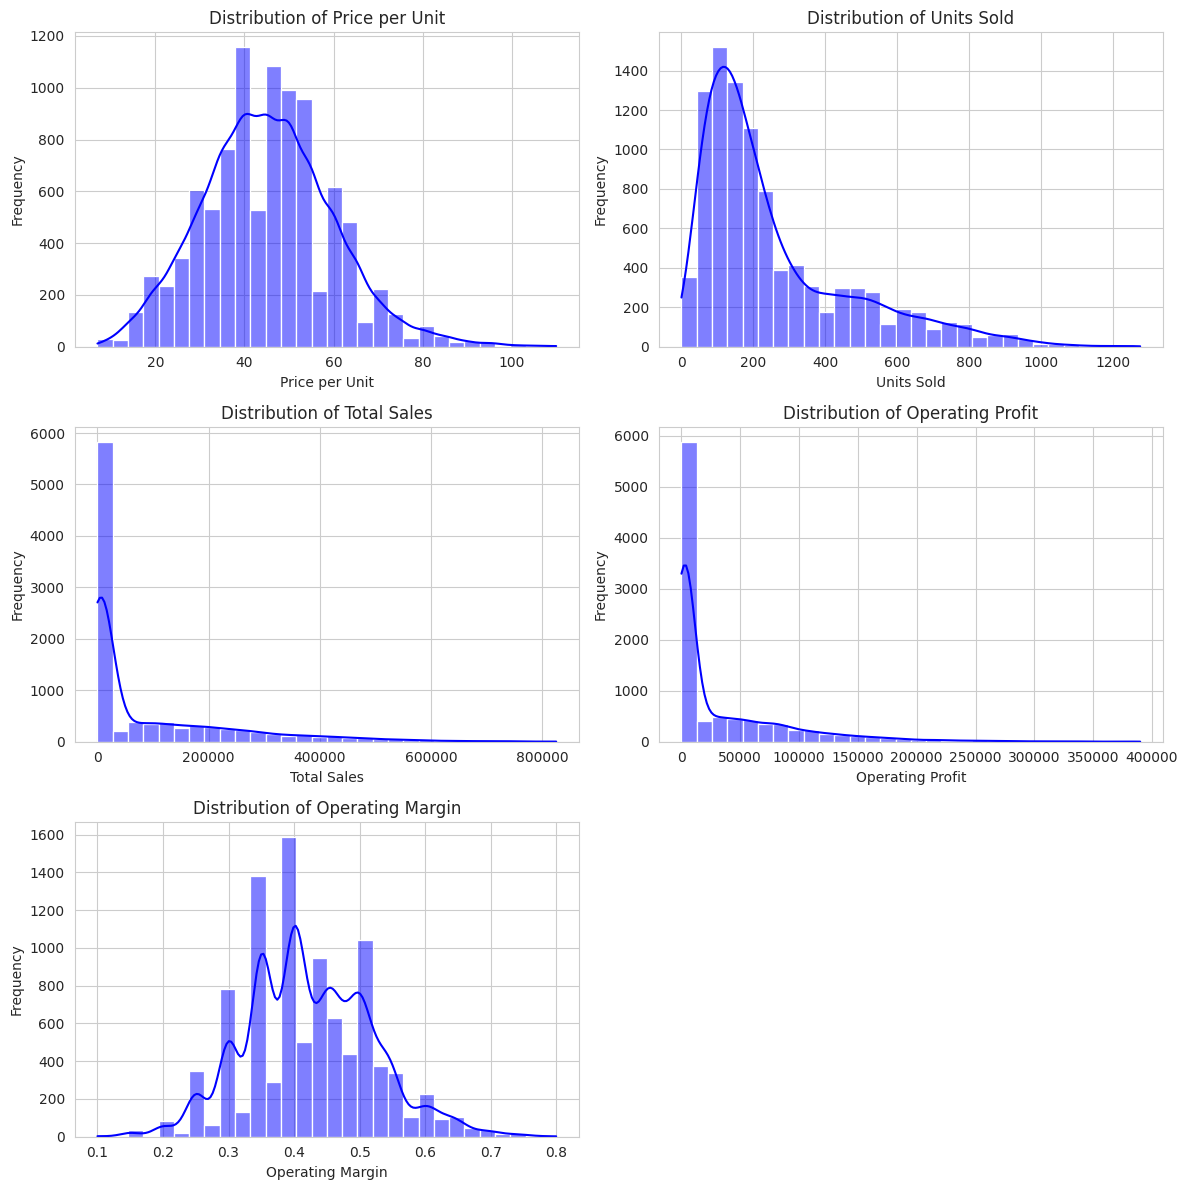

In [13]:
# Visualization of numeric distributions
numeric_cols = [col for col in df.select_dtypes(include=['number']) if col not in ['Day', 'Month', 'Year']]
n = len(numeric_cols)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(12, 4 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

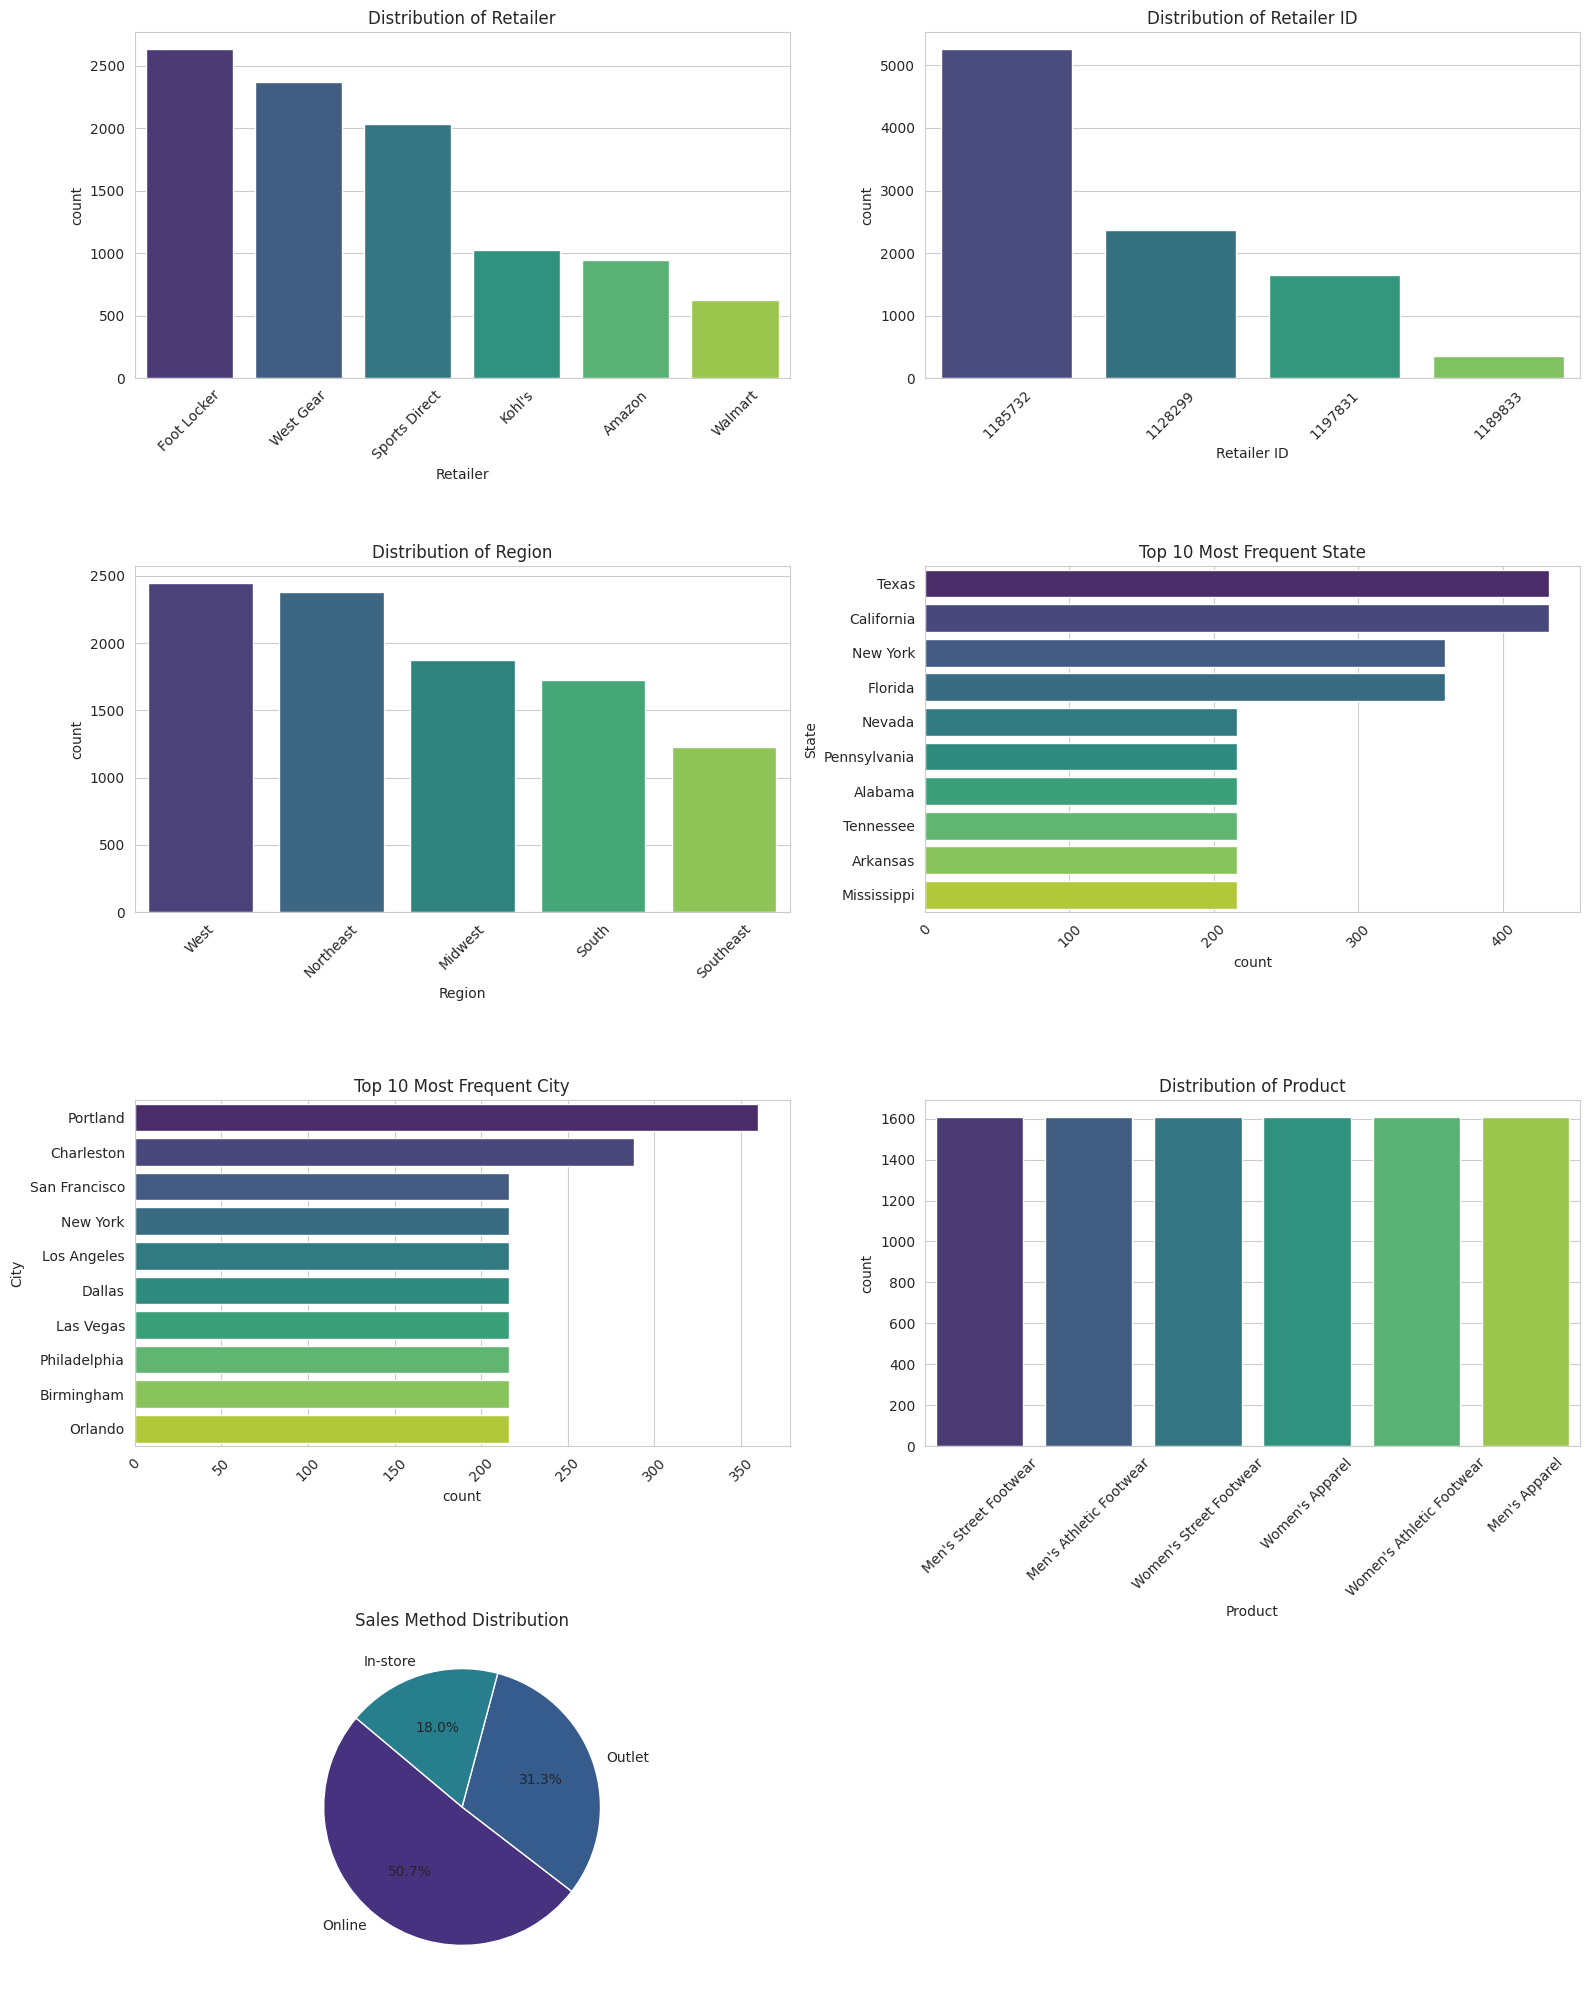

In [14]:
# Visualization of categorical distributions
plt.figure(figsize=(16, 20))
categorical_cols = ['Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product', 'Sales Method']

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)

    if col == 'Sales Method':
        method_counts = df[col].value_counts()
        plt.pie(method_counts, labels=method_counts.index, autopct='%1.1f%%',
                startangle=140, colors=sns.color_palette('viridis'))
        plt.title('Sales Method Distribution')

    elif col in ['City', 'State']:
        top_items = df[col].value_counts().head(10).index
        sns.countplot(data=df[df[col].isin(top_items)], y=col, order=top_items, palette='viridis')
        plt.title(f'Top 10 Most Frequent {col}')
        plt.xticks(rotation=45)

    else:
        order = df[col].value_counts().index
        sns.countplot(data=df, x=col, order=order, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#*1. Top Selling Products*

Top Selling Products:
 Product
Men's Street Footwear        593320
Men's Athletic Footwear      435526
Women's Apparel              433827
Women's Street Footwear      392269
Women's Athletic Footwear    317236
Men's Apparel                306683
Name: Units Sold, dtype: int64


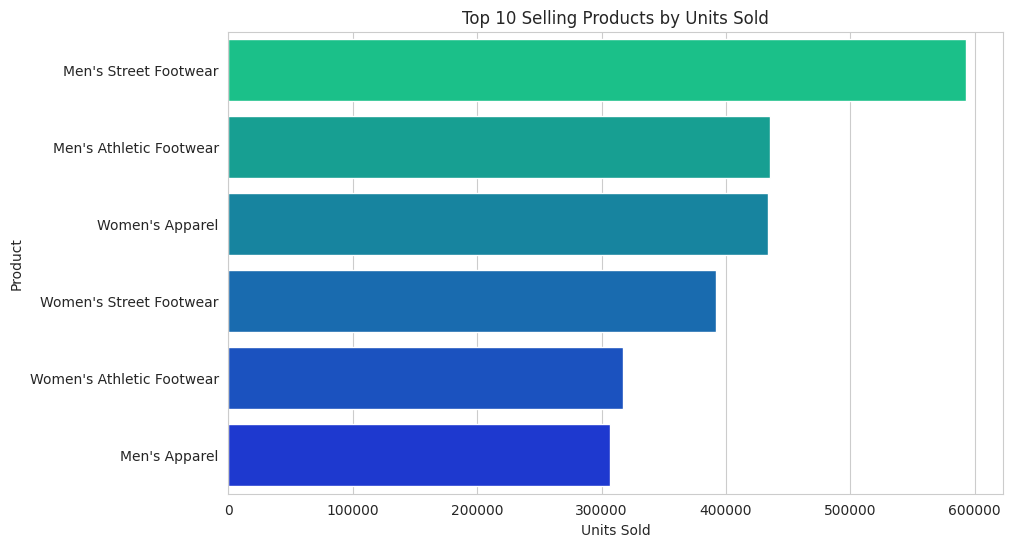

In [15]:
top_products = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
print('Top Selling Products:\n', top_products)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='winter_r')
plt.title('Top 10 Selling Products by Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.show()

#*2. Top Revenue and Avg Operating Margin of Retailers*

Total Sales per Retailer:
Retailer
West Gear        $242,964,333
Foot Locker      $220,094,720
Sports Direct    $182,470,997
Kohl's           $102,114,753
Amazon            $77,698,912
Walmart           $74,558,410
Name: Total Sales, dtype: object

Avg Operating Margin per Retailer:
Retailer
Sports Direct    44.49%
Kohl's           41.93%
Foot Locker      41.79%
Amazon           41.79%
West Gear        41.79%
Walmart          40.65%
Name: Operating Margin, dtype: object


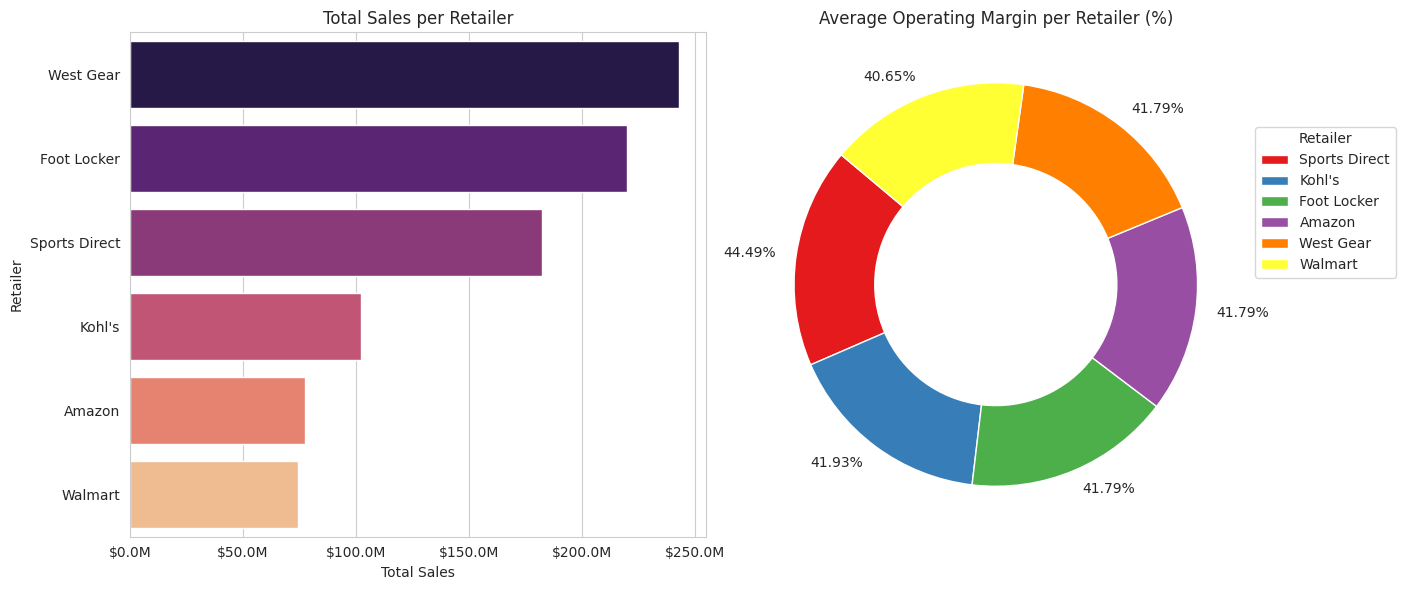

In [16]:
# Count total sales & margin
top_retailers = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
retailer_margin = df.groupby('Retailer')['Operating Margin'].mean().sort_values(ascending=False) * 100

print("Total Sales per Retailer:")
print(top_retailers.round(2).apply(lambda x: f'${x:,.0f}'))
print("\nAvg Operating Margin per Retailer:")
print(retailer_margin.round(2).apply(lambda x: f'{x:.2f}%'))

# Visualisasi
plt.figure(figsize=(14, 6))

# Bar chart - Total Sales
plt.subplot(1, 2, 1)
sns.barplot(x=top_retailers.values, y=top_retailers.index, palette='magma')
plt.title('Total Sales per Retailer')
plt.xlabel('Total Sales')
plt.ylabel('Retailer')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
plt.tight_layout()

# Pie chart - Operating Margin
plt.subplot(1, 2, 2)
labels = [f"{value:.2f}%" for value in retailer_margin.values]

patches, texts = plt.pie(retailer_margin.values,
                         labels=labels,
                         startangle=140,
                         colors=plt.cm.Set1.colors,
                         wedgeprops=dict(width=0.4))
# Legend
plt.legend(patches,
           retailer_margin.index,
           title='Retailer',
           loc='best',
           bbox_to_anchor=(1, 0.5))
plt.title('Average Operating Margin per Retailer (%)')

plt.tight_layout()
plt.show()

#*3. Top Total Sales & Profit by Region*

Total Sales & Operating Profit by Region:
   Region  Total Sales Operating Profit
  Midwest $135,800,459      $52,811,346
Northeast $186,324,067      $68,020,588
    South $144,663,181      $61,138,004
Southeast $163,171,236      $60,555,417
     West $269,943,182      $89,609,407


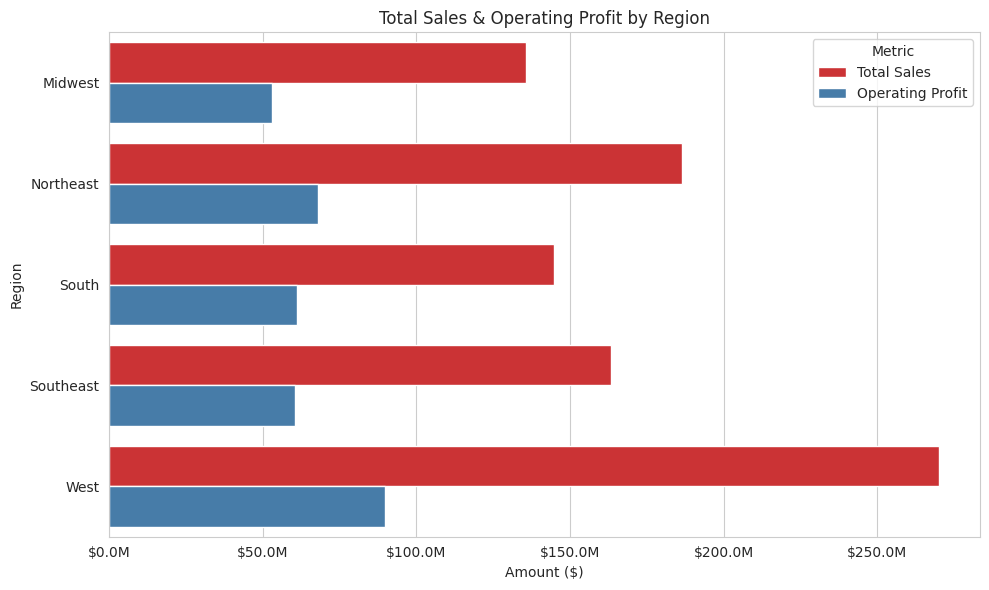

In [17]:
# Count total sales & profit per region
sales_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
profit_region = df.groupby('Region')['Operating Profit'].sum().sort_values(ascending=False)

combined = pd.DataFrame({
    'Total Sales': sales_region,
    'Operating Profit': profit_region
}).reset_index()

combined_print = combined.copy()
combined_print['Total Sales'] = combined_print['Total Sales'].apply(lambda x: f"${x:,.0f}")
combined_print['Operating Profit'] = combined_print['Operating Profit'].apply(lambda x: f"${x:,.0f}")

print("Total Sales & Operating Profit by Region:")
print(combined_print.to_string(index=False))

combined_melted = combined.melt(id_vars='Region',
                                value_vars=['Total Sales', 'Operating Profit'],
                                var_name='Metric', value_name='Amount')

# Combined visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_melted,
            y='Region',
            x='Amount',
            hue='Metric',
            palette='Set1')

plt.title('Total Sales & Operating Profit by Region')
plt.xlabel('Amount ($)')
plt.ylabel('Region')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1000000:.1f}M"))
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

#*4. Best Sales and Growth by Month*

In [18]:
# Calculate total sales per month per year
monthly_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Create complete combinations of Year and Month
years = df['Year'].unique()
months = list(range(1, 13))
full_index = pd.MultiIndex.from_product([years, months], names=['Year', 'Month'])

# Reindex to ensure all Year-Month combinations are present
monthly_sales = monthly_sales.set_index(['Year', 'Month']).reindex(full_index).reset_index()

# Calculate Sales Growth % (percentage change within each year)
monthly_sales['Sales Growth'] = monthly_sales.groupby('Year')['Total Sales'].pct_change() * 100

# Create formatted string columns for display
monthly_sales['Total Sales USD'] = monthly_sales['Total Sales'].apply(lambda x: f"${x:,.0f}")
monthly_sales['Sales Growth (%)'] = monthly_sales['Sales Growth'].apply(
    lambda x: f"{x:.2f}%" if pd.notnull(x) else "NaN")

# Display formatted output
print(monthly_sales[['Year', 'Month', 'Total Sales USD', 'Sales Growth (%)']])

    Year  Month Total Sales USD Sales Growth (%)
0   2020      1     $16,253,746              NaN
1   2020      2     $14,997,988           -7.73%
2   2020      3     $17,660,577           17.75%
3   2020      4     $24,607,006           39.33%
4   2020      5     $16,918,014          -31.25%
5   2020      6      $8,829,819          -47.81%
6   2020      7     $17,146,013           94.18%
7   2020      8     $19,877,980           15.93%
8   2020      9     $18,304,436           -7.92%
9   2020     10     $10,836,269          -40.80%
10  2020     11      $8,622,300          -20.43%
11  2020     12      $8,026,527           -6.91%
12  2021      1     $55,225,396              NaN
13  2021      2     $46,102,165          -16.52%
14  2021      3     $39,148,532          -15.08%
15  2021      4     $47,732,964           21.93%
16  2021      5     $63,589,681           33.22%
17  2021      6     $65,917,553            3.66%
18  2021      7     $78,334,681           18.84%
19  2021      8     

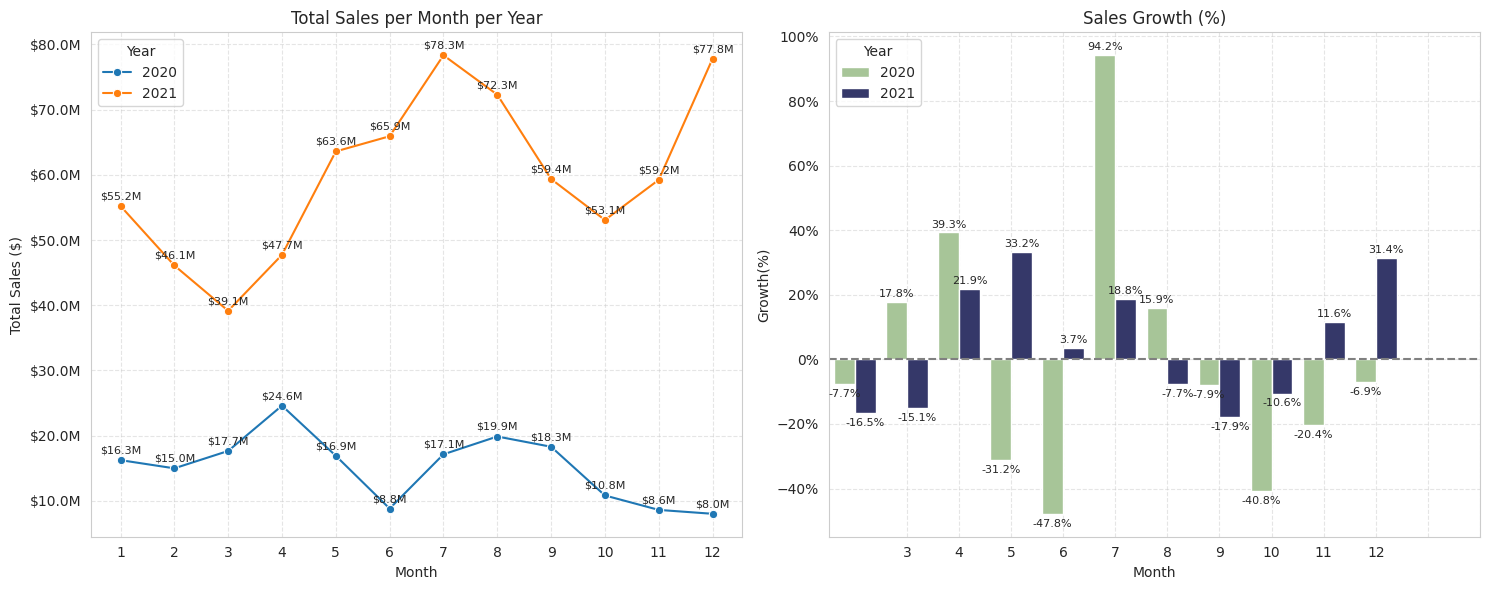

In [25]:
plt.figure(figsize=(15, 6))

# Lineplot - Total Sales per Month per Year
plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_sales.dropna(subset=['Total Sales']),
             x='Month', y='Total Sales', hue='Year', marker='o', palette='tab10')

# Add value labels on each point
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    for i in range(len(data)):
        x = data.iloc[i]['Month']
        y = data.iloc[i]['Total Sales']
        plt.text(x, y + 1_000_000, f"${y/1_000_000:.1f}M", fontsize=8, ha='center')

# Axis and style formatting
plt.title('Total Sales per Month per Year')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1_000_000:.1f}M'))
plt.legend(title='Year', loc='upper left')

# Barplot - Sales Growth per Month
plt.subplot(1, 2, 2)

# Convert percentage string to numeric for plotting
monthly_sales['GrowthNumeric'] = monthly_sales['Sales Growth (%)'].str.replace('%','').astype(float)

sns.barplot(data=monthly_sales.dropna(subset=['GrowthNumeric']),
            x='Month', y='GrowthNumeric', hue='Year', palette='crest')

plt.axhline(0, color='gray', linestyle='--')

# Add labels above each bar
for bar in plt.gca().patches:
    height = bar.get_height()
    if height != 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + (1.5 if height > 0 else -4),
                 f'{height:.1f}%', ha='center', fontsize=8)

# Axis and style formatting
plt.title('Sales Growth (%)')
plt.xlabel('Month')
plt.ylabel('Growth(%)')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
plt.legend(title='Year', loc='upper left')

plt.tight_layout()
plt.show()

Total Sales in a Week:
 Weekday
Monday       $112,335,387
Saturday     $117,929,979
Sunday       $120,017,988
Wednesday    $120,114,465
Tuesday      $137,138,087
Thursday     $145,683,120
Friday       $146,683,099
Name: Total Sales, dtype: object


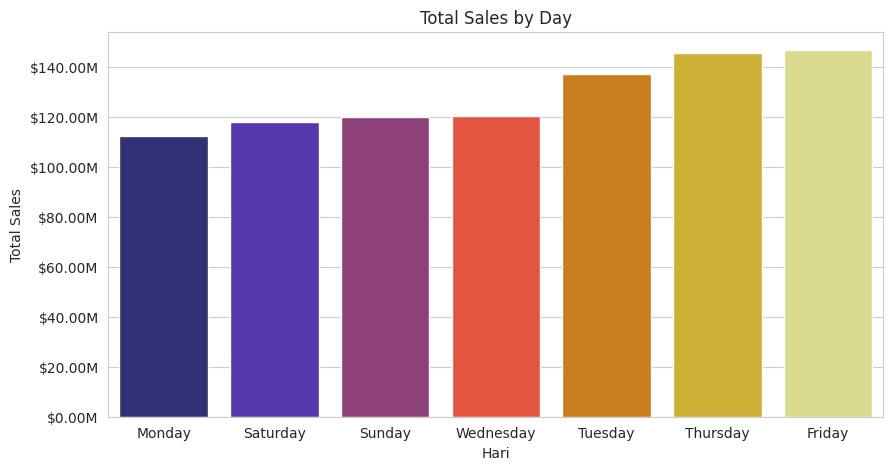

In [20]:
sales_by_weekday = df.groupby('Weekday')['Total Sales'].sum().sort_values()
print('Total Sales in a Week:\n', sales_by_weekday.round(2).apply(lambda x: f'${x:,.0f}'))

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values, palette='CMRmap')
plt.title('Total Sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1000000:.2f}M'))
plt.show()

#*5. Average Operating Margin by Sales Method*

Avg Operating Margin by Sales Method:
 Sales Method
Online      46%
Outlet      39%
In-store    36%
Name: Operating Margin, dtype: object
Total Sales by Sales Method:
 Sales Method
In-store    $356,643,750
Outlet      $295,585,493
Online      $247,672,882
Name: Total Sales, dtype: object


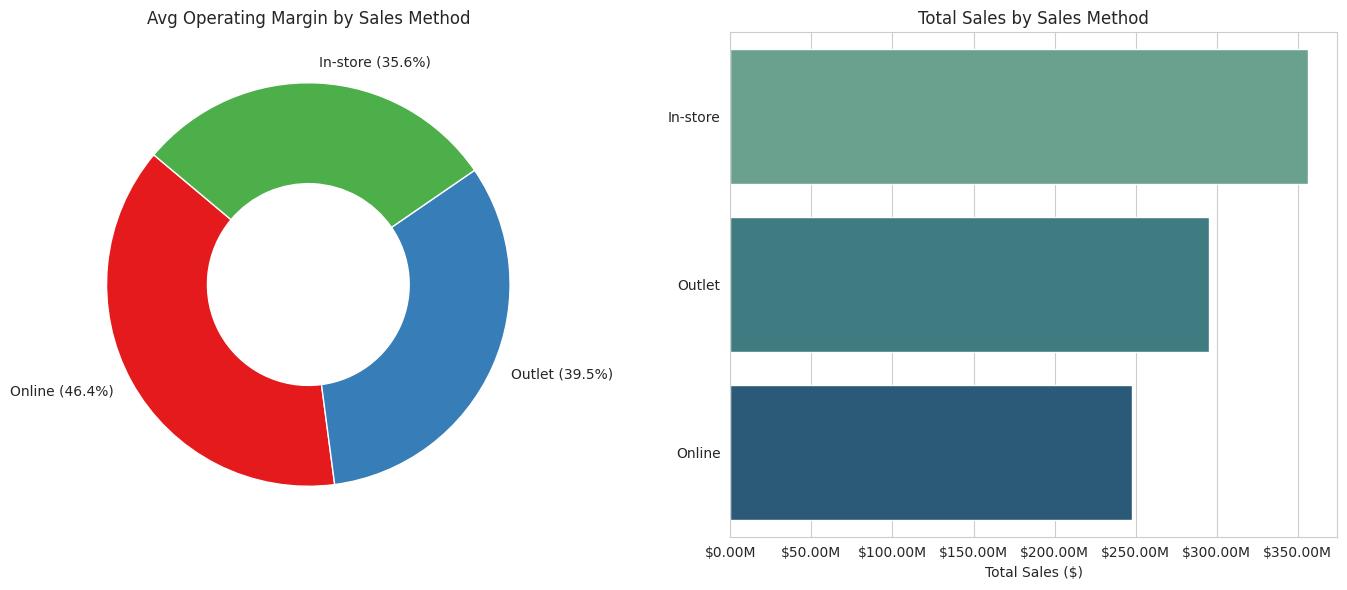

In [21]:
margin_method = df.groupby('Sales Method')['Operating Margin'].mean().sort_values(ascending=False) * 100
sales_by_method = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)

print('Avg Operating Margin by Sales Method:\n', margin_method.round(2).apply(lambda x: f'{x:.0f}%'))
print('Total Sales by Sales Method:\n',sales_by_method.round(2).apply(lambda x: f'${x:,.0f}'))

plt.figure(figsize=(14, 6))

# Pie Chart - Avg Operating Margin
plt.subplot(1, 2, 1)
plt.pie(margin_method.values,
        labels=[f"{label} ({value:.1f}%)" for label, value in zip(margin_method.index, margin_method.values)],
        startangle=140,
        colors=plt.cm.Set1.colors,
        wedgeprops=dict(width=0.5))  # Donut style

plt.title('Avg Operating Margin by Sales Method')

#  Barplot - Total Sales
plt.subplot(1, 2, 2)
sns.barplot(x=sales_by_method.values, y=sales_by_method.index, palette='crest')
plt.title('Total Sales by Sales Method')
plt.xlabel('Total Sales ($)')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1000000:.2f}M'))

plt.tight_layout()
plt.show()

#*6. Top 10 Most State HIghest Sales*

Top 10 Most State Highest Sales:
 State
New York          $64,229,039
California        $60,174,133
Florida           $59,283,714
Texas             $46,359,746
South Carolina    $29,285,637
Washington        $26,330,718
North Carolina    $23,956,531
Louisiana         $23,750,781
Hawaii            $22,282,457
Virginia          $21,575,040
Name: Total Sales, dtype: object


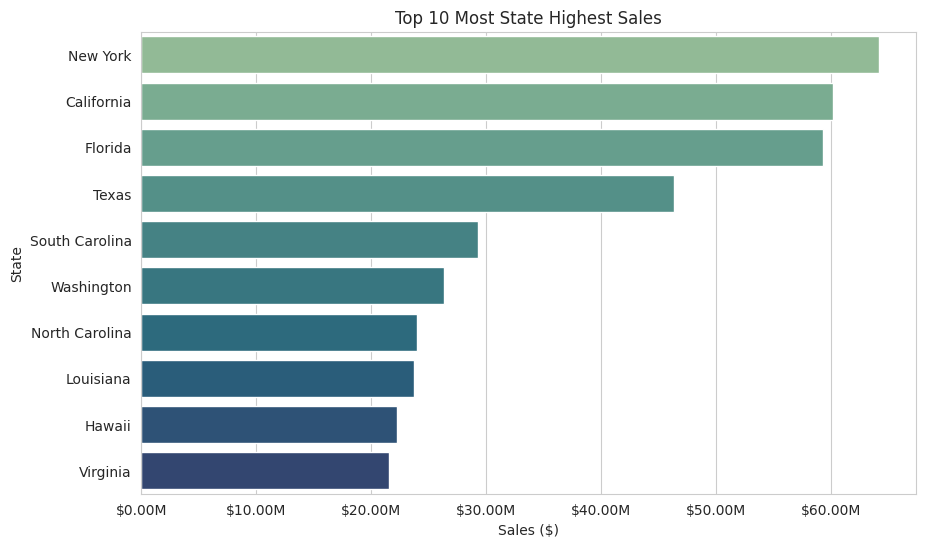

In [22]:
top_states = df.groupby('State')['Total Sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 Most State Highest Sales:\n',top_states.round(2).apply(lambda x: f'${x:,.0f}'))
plt.figure(figsize=(10, 6))

sns.barplot(x=top_states.values, y=top_states.index, palette='crest')
plt.title('Top 10 Most State Highest Sales')
plt.xlabel('Sales ($)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1000000:.2f}M'))
plt.show()

#*7. Products Sold per Region*

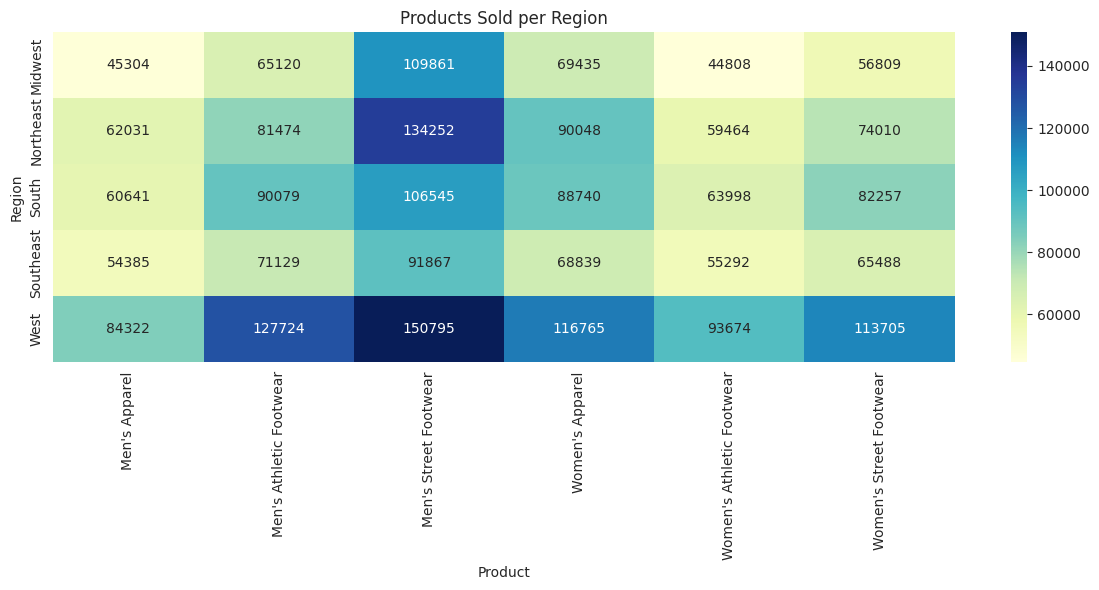

In [23]:
product_region = df.groupby(['Region', 'Product'])['Units Sold'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(product_region, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Products Sold per Region')
plt.xlabel('Product')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

#*8. Products by Margin vs Volume*

0                          Units Sold  Operating Margin    Total Sales
Product                                                               
Men's Apparel              190.960772          0.413225   77041.489415
Men's Athletic Footwear    270.513043          0.402702   95449.490683
Men's Street Footwear      368.521739          0.446130  129705.741615
Women's Apparel            269.792910          0.441318  111342.574627
Women's Athletic Footwear  197.531756          0.424359   66395.950187
Women's Street Footwear    243.948383          0.410199   79603.739428


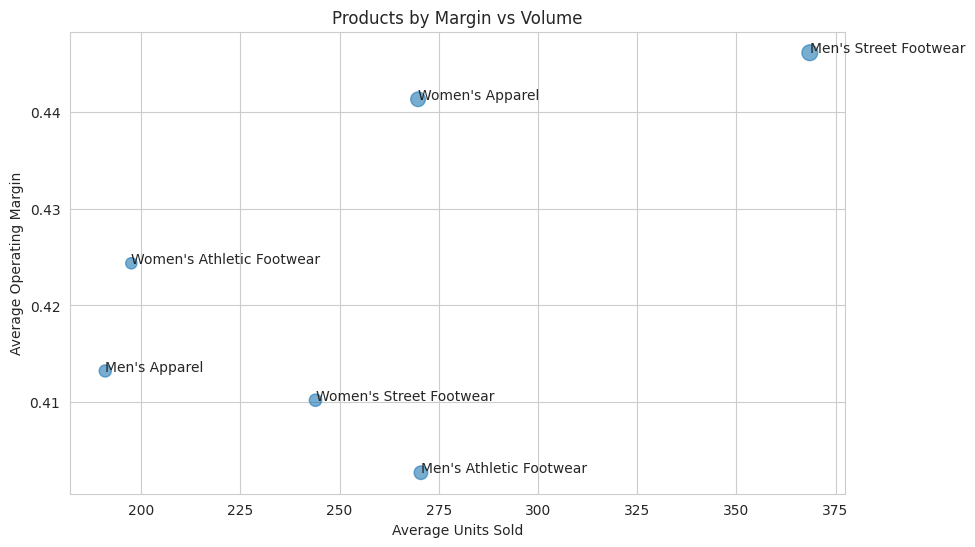

In [24]:
product_stats = df.groupby('Product')[['Units Sold', 'Operating Margin', 'Total Sales']].mean()
print(product_stats)

plt.figure(figsize=(10, 6))
plt.scatter(product_stats['Units Sold'], product_stats['Operating Margin'],
            s=product_stats['Total Sales'] / 1000, alpha=0.6)
for i in product_stats.index:
    plt.text(product_stats.loc[i, 'Units Sold'], product_stats.loc[i, 'Operating Margin'], i, fontsize=10)
plt.xlabel('Average Units Sold')
plt.ylabel('Average Operating Margin')
plt.title('Products by Margin vs Volume')
plt.grid(True)
plt.show()